In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.insert(0, '../../../../')
from copy import deepcopy
import datetime
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer,
    run_trainers
)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [12]:
def plot_hist_next_and_predicted(df, ranking_type):
        max_value = int(df['next_state'].max())

        if ranking_type == 'ranking':
            font_size = 8
        elif ranking_type == 'windsorized_ranking':
            font_size = 10
        elif ranking_type == 'broad_ranking':
            font_size = 12
        elif ranking_type == 'is_investment_grade':
            pass

        g = sns.FacetGrid(df, col='next_state', col_wrap=4, sharex=False)
        g.map(plt.hist, 'predicted_state', bins=range(1, max_value + 2, 1), color='c', align='left')
        g.set(xticks=range(1, max_value + 1, 1))

        if ranking_type != 'is_investment_grade':
            for ax in g.axes.flat:
                for label in ax.get_xticklabels():
                    label.set_fontsize(font_size)
                    label.set_rotation(90)

# Read Data

In [2]:
original_features_df = pd.read_csv("../../../../../data/credit_rating/intermediate_data/annual_credit_rating_features.csv")

In [3]:
dt_model = DecisionTreeClassifier()
trainer_whole = RatingModelTrainer(original_features_df, dt_model, output_type='windsorized_ranking', dev_type='whole')
trainer_delta = RatingModelTrainer(original_features_df, dt_model, output_type='windsorized_ranking', dev_type='delta')
trainer_mixed = RatingModelTrainer(original_features_df, dt_model, output_type='windsorized_ranking', dev_type='mixed')

In [ ]:
run_trainers([trainer_whole, trainer_delta, trainer_mixed], ["whole", "delta", "mixed"])

In [4]:
dt_model_balanced = DecisionTreeClassifier(class_weight='balanced')
trainer_whole_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='windsorized_ranking', dev_type='whole')
trainer_delta_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='windsorized_ranking', dev_type='delta')
trainer_mixed_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='windsorized_ranking', dev_type='mixed')

In [ ]:
run_trainers([trainer_whole_balanced, trainer_delta_balanced, trainer_mixed_balanced], ["whole", "delta", "mixed"])

In [5]:
trainer_whole.make_dev_and_test_df(threshold_year=2005)

In [6]:
trainer_whole.train_model()

/Users/wentaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Precision,Recall,F1 Score
micro,0.1515,0.1515,0.1515
macro,0.1443,0.1528,0.1382
weighted,0.1713,0.1515,0.1554


Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.05      0.21      0.08        62
        2.0       0.04      0.10      0.06       103
        3.0       0.05      0.12      0.07       145
        4.0       0.10      0.20      0.13       284
        5.0       0.13      0.21      0.16       523
        6.0       0.10      0.14      0.12       574
        7.0       0.14      0.16      0.15       875
        8.0       0.18      0.16      0.17      1225
        9.0       0.13      0.12      0.13       934
       10.0       0.12      0.09      0.10       682
       11.0       0.18      0.14      0.16       942
       12.0       0.20      0.17      0.18      1096
       13.0       0.22      0.19      0.20       973
       14.0       0.31      0.14      0.19       819
       15.0       0.19      0.10      0.13       389
       16.0       0.16      0.20      0.18       192

avg / total       0.17      0.15      0.16      9818

Confusion M

../../../../helpers/rating_model_helpers.py:172: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif any(direction in true_classes for direction in change_directions):


Confusion matrix, without normalization


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,13,9,11,10,5,4,5,1,2,0,0,0,1,0,0,1
2,18,10,16,12,18,12,3,2,3,0,1,0,0,0,0,8
3,26,13,17,21,22,10,6,8,11,1,4,1,0,0,0,5
4,36,25,23,58,37,27,16,23,18,4,8,7,2,0,0,0
5,44,36,44,86,110,49,54,43,20,8,6,13,4,2,0,4
6,32,33,47,66,73,80,61,97,39,12,9,14,6,2,0,3
7,41,44,59,88,136,116,138,120,57,21,25,12,11,3,1,3
8,27,38,44,96,152,172,212,195,102,53,48,45,29,5,2,5
9,13,16,23,56,101,123,127,131,113,73,63,59,20,7,3,6
10,11,13,13,27,62,52,78,103,94,63,64,48,39,7,5,3


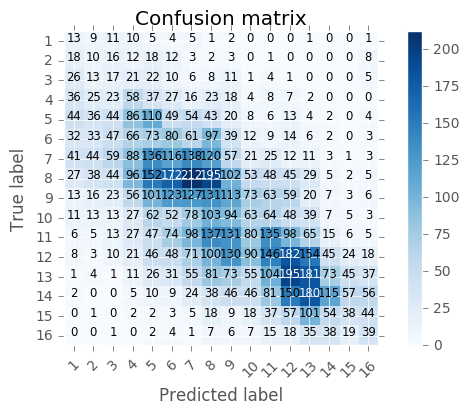

In [7]:
trainer_whole.display_results(trainer_whole.y_test, trainer_whole.y_predicted)

,Precision,Recall,F1 Score
micro,0.0378,0.0378,0.0378
macro,0.0399,0.0342,0.0350
weighted,0.0480,0.0378,0.0408


Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        49
        2.0       0.00      0.00      0.00        93
        3.0       0.01      0.02      0.01       130
        4.0       0.01      0.03      0.02       234
        5.0       0.01      0.02      0.01       421
        6.0       0.02      0.02      0.02       506
        7.0       0.03      0.04      0.04       766
        8.0       0.04      0.03      0.03      1063
        9.0       0.03      0.02      0.02       840
       10.0       0.04      0.03      0.03       638
       11.0       0.07      0.05      0.06       850
       12.0       0.07      0.06      0.06       969
       13.0       0.06      0.05      0.05       832
       14.0       0.10      0.04      0.05       731
       15.0       0.08      0.04      0.06       366
       16.0       0.08      0.10      0.09       170

avg / total       0.05      0.04      0.04      8658

Confusion M

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0,9,11,10,5,4,5,1,2,0,0,0,1,0,0,1
2,18,0,16,12,18,12,3,2,3,0,1,0,0,0,0,8
3,26,13,2,21,22,10,6,8,11,1,4,1,0,0,0,5
4,36,25,23,8,37,27,16,23,18,4,8,7,2,0,0,0
5,44,36,44,86,8,49,54,43,20,8,6,13,4,2,0,4
6,32,33,47,66,73,12,61,97,39,12,9,14,6,2,0,3
7,41,44,59,88,136,116,29,120,57,21,25,12,11,3,1,3
8,27,38,44,96,152,172,212,33,102,53,48,45,29,5,2,5
9,13,16,23,56,101,123,127,131,19,73,63,59,20,7,3,6
10,11,13,13,27,62,52,78,103,94,19,64,48,39,7,5,3


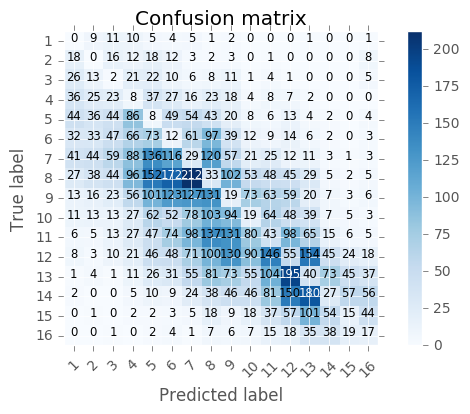

In [8]:
trainer_whole.display_results(trainer_whole.y_test_delta, trainer_whole.y_predicted_delta)

,Precision,Recall,F1 Score
micro,0.2546,0.2546,0.2546
macro,0.3641,0.4079,0.2481
weighted,0.6177,0.2546,0.2570


Detailed classification report:
             precision    recall  f1-score   support

  downgrade       0.16      0.34      0.22      1150
       keep       0.77      0.16      0.26      7360
    upgrade       0.16      0.72      0.26      1308

avg / total       0.62      0.25      0.26      9818

Confusion Matrix:
Confusion matrix, without normalization


,downgrade,keep,upgrade
downgrade,395,175,580
keep,1875,1160,4325
upgrade,192,171,945


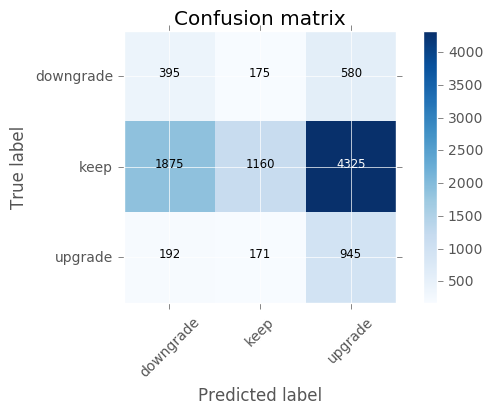

In [9]:
trainer_whole.display_results(trainer_whole.test_df['next_direction'].ravel(), trainer_whole.test_df['predicted_direction'].ravel())

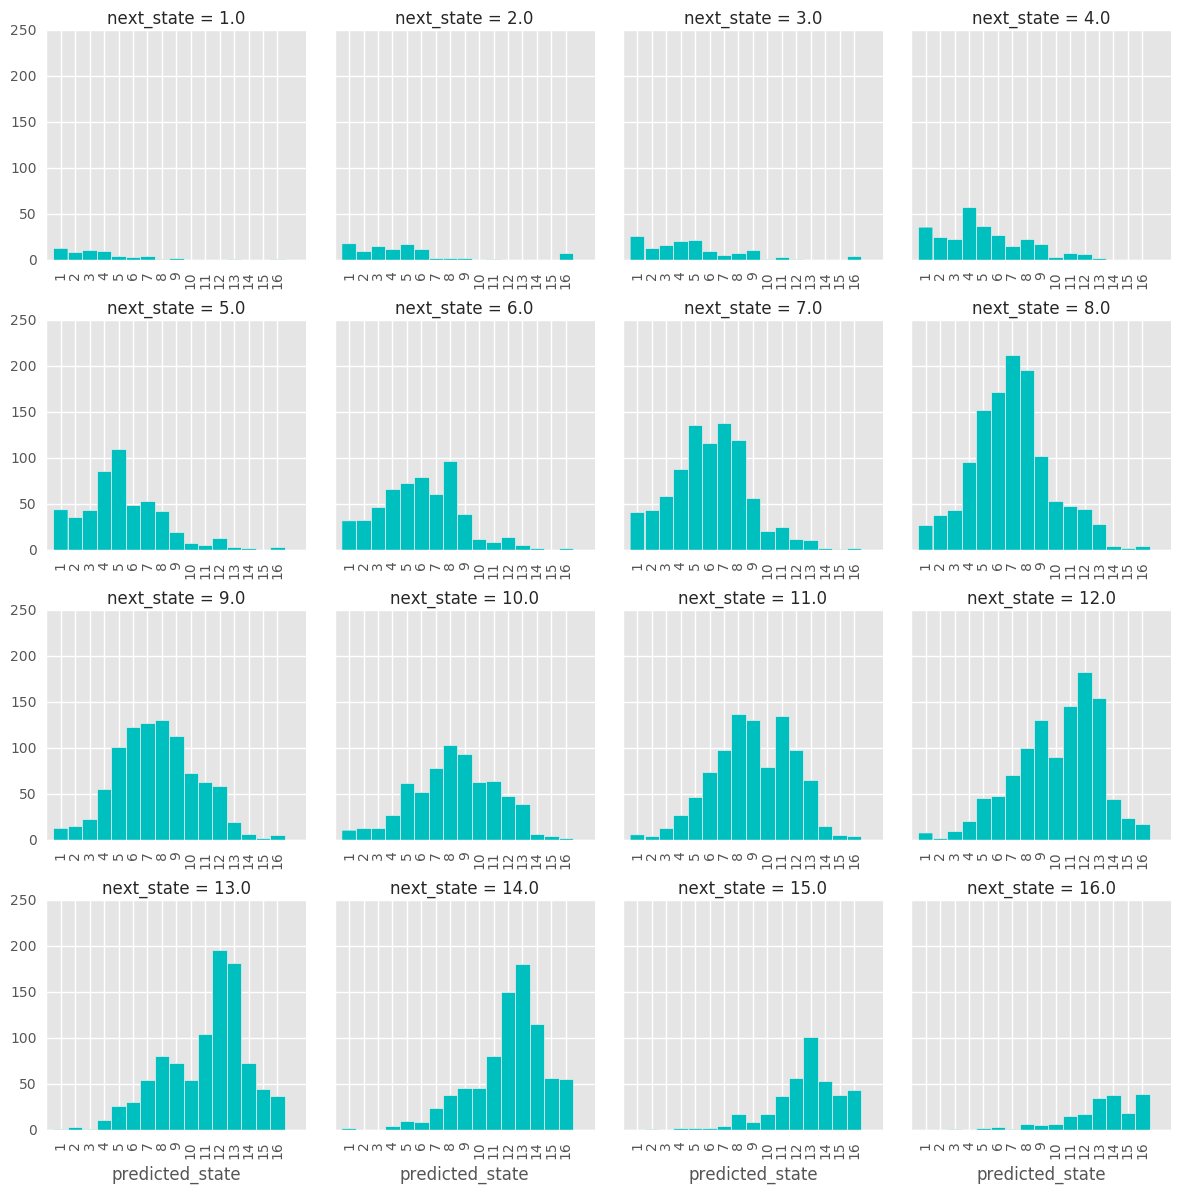

In [16]:
plot_hist_next_and_predicted(trainer_whole.test_df, 'windsorized_ranking')

In [17]:
trainer_whole_balanced.make_dev_and_test_df(threshold_year=2005)

In [19]:
trainer_whole_balanced.train_model()

,Precision,Recall,F1 Score
micro,0.1427,0.1427,0.1427
macro,0.1375,0.1498,0.1319
weighted,0.1637,0.1427,0.1477


Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.04      0.19      0.07        62
        2.0       0.07      0.23      0.11       103
        3.0       0.05      0.14      0.07       145
        4.0       0.08      0.15      0.10       284
        5.0       0.09      0.14      0.11       523
        6.0       0.10      0.13      0.11       574
        7.0       0.15      0.15      0.15       875
        8.0       0.19      0.15      0.17      1225
        9.0       0.13      0.12      0.12       934
       10.0       0.11      0.09      0.10       682
       11.0       0.12      0.10      0.11       942
       12.0       0.21      0.16      0.18      1096
       13.0       0.25      0.23      0.24       973
       14.0       0.26      0.13      0.17       819
       15.0       0.20      0.10      0.14       389
       16.0       0.16      0.18      0.17       192

avg / total       0.16      0.14      0.15      9818

Confusion M

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,12,9,9,13,11,1,5,1,1,0,0,0,0,0,0,0
2,16,24,21,5,15,9,2,2,4,2,1,1,0,1,0,0
3,21,27,20,24,18,7,8,6,8,1,4,0,1,0,0,0
4,50,39,34,44,25,26,17,17,17,1,7,4,2,1,0,0
5,61,51,43,78,75,61,54,39,22,15,8,6,10,0,0,0
6,30,40,49,67,93,76,64,65,34,15,25,5,5,4,0,2
7,45,56,64,99,134,112,129,112,47,29,15,21,6,3,1,2
8,36,44,61,92,166,126,161,186,139,82,56,45,22,7,2,0
9,9,19,39,62,107,110,132,129,109,57,71,39,33,9,2,7
10,12,17,26,23,66,57,80,91,68,62,80,45,29,13,7,6


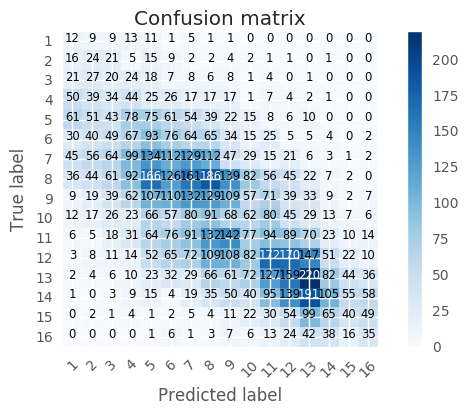

In [21]:
trainer_whole_balanced.display_results(trainer_whole_balanced.y_test, trainer_whole_balanced.y_predicted)

,Precision,Recall,F1 Score
micro,0.0354,0.0354,0.0354
macro,0.0386,0.0337,0.0342
weighted,0.0447,0.0354,0.0385


Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        50
        2.0       0.01      0.02      0.01        81
        3.0       0.01      0.02      0.01       128
        4.0       0.01      0.01      0.01       243
        5.0       0.01      0.01      0.01       454
        6.0       0.02      0.02      0.02       509
        7.0       0.03      0.03      0.03       767
        8.0       0.03      0.03      0.03      1066
        9.0       0.02      0.02      0.02       838
       10.0       0.03      0.03      0.03       638
       11.0       0.05      0.04      0.04       883
       12.0       0.05      0.04      0.04       961
       13.0       0.11      0.09      0.10       831
       14.0       0.07      0.03      0.04       735
       15.0       0.11      0.05      0.07       368
       16.0       0.08      0.10      0.09       174

avg / total       0.04      0.04      0.04      8726

Confusion M

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0,9,9,13,11,1,5,1,1,0,0,0,0,0,0,0
2,16,2,21,5,15,9,2,2,4,2,1,1,0,1,0,0
3,21,27,3,24,18,7,8,6,8,1,4,0,1,0,0,0
4,50,39,34,3,25,26,17,17,17,1,7,4,2,1,0,0
5,61,51,43,78,6,61,54,39,22,15,8,6,10,0,0,0
6,30,40,49,67,93,11,64,65,34,15,25,5,5,4,0,2
7,45,56,64,99,134,112,21,112,47,29,15,21,6,3,1,2
8,36,44,61,92,166,126,161,27,139,82,56,45,22,7,2,0
9,9,19,39,62,107,110,132,129,13,57,71,39,33,9,2,7
10,12,17,26,23,66,57,80,91,68,18,80,45,29,13,7,6


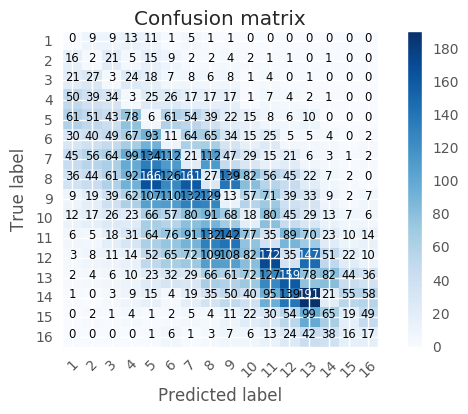

In [22]:
trainer_whole_balanced.display_results(trainer_whole_balanced.y_test_delta, trainer_whole_balanced.y_predicted_delta)